Upload code to colab along with dataset in resources for it to run properly

# 1. Preparing Dataset

## Preparing labelled dataset

In [1]:
!unzip /content/TIRES.zip

Archive:  /content/TIRES.zip
   creating: TIRES/
   creating: TIRES/front/
  inflating: TIRES/front/img (3005).JPG  
  inflating: TIRES/front/img (3011).JPG  
  inflating: TIRES/front/img (3013).JPG  
  inflating: TIRES/front/img (3014).JPG  
  inflating: TIRES/front/img (3020).JPG  
  inflating: TIRES/front/img (3031).JPG  
  inflating: TIRES/front/img (3034).JPG  
  inflating: TIRES/front/img (3041).JPG  
  inflating: TIRES/front/img (3043).JPG  
  inflating: TIRES/front/img (3047).JPG  
  inflating: TIRES/front/img (3051).JPG  
  inflating: TIRES/front/img (3054).JPG  
  inflating: TIRES/front/img (3095).JPG  
  inflating: TIRES/front/img (3110).JPG  
  inflating: TIRES/front/img (3111).JPG  
  inflating: TIRES/front/img (3114).JPG  
  inflating: TIRES/front/img (3120).JPG  
  inflating: TIRES/front/img (3134).JPG  
  inflating: TIRES/front/img (3140).JPG  
  inflating: TIRES/front/img (3142).JPG  
  inflating: TIRES/front/img (3147).JPG  
  inflating: TIRES/front/img (3152).JPG  
 

In [8]:
import os
import cv2
import numpy as np

X = []
y = []

for folder_name in os.listdir("/content/TIRES"):
  cur_folder = os.path.join("/content/TIRES", folder_name)
  for label in os.listdir(cur_folder):
    img_path = os.path.join(cur_folder, label)
    img = cv2.imread(img_path)

    if img is not None:
      img = cv2.resize(img, (64, 64))
      img = img.flatten()
      X.append(img)
      y.append(folder_name)

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3000, 12288), (3000,))

In [10]:
X[ :5]

array([[ 50, 177, 248, ...,  13, 100, 180],
       [ 42, 153, 223, ...,  33, 115, 170],
       [ 15, 146, 225, ...,  20,  84, 139],
       [ 12, 150, 227, ...,  15,  93, 152],
       [ 46, 142, 217, ...,  21, 116, 166]], dtype=uint8)

In [11]:
y[ :5]

array(['front', 'front', 'front', 'front', 'front'], dtype='<U10')

In [13]:
np.unique(y)

array(['MultiTires', 'OCR', 'front', 'side'], dtype='<U10')

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

y_encoded[:5], encoder.classes_

(array([2, 2, 2, 2, 2]),
 array(['MultiTires', 'OCR', 'front', 'side'], dtype='<U10'))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Preparing random images set

In [27]:
!unzip /content/random.zip

Archive:  /content/random.zip
   creating: random/
  inflating: random/14038843825.JPG  
  inflating: random/140422934160.JPG  
  inflating: random/140423293635.JPG  
  inflating: random/140424023629.JPG  
  inflating: random/140424790626.JPG  
  inflating: random/140441004586.JPG  
  inflating: random/140483604855.JPG  
  inflating: random/140484913180.JPG  
  inflating: random/140501173862.JPG  
  inflating: random/140510444142.JPG  
  inflating: random/140510482877.JPG  
  inflating: random/140510673837.JPG  
  inflating: random/140544067164.JPG  
  inflating: random/140545042860.JPG  
  inflating: random/140596269813.JPG  
  inflating: random/140605904483.JPG  
  inflating: random/140630795691.JPG  
  inflating: random/140631140781.JPG  
  inflating: random/140665219438.JPG  
  inflating: random/140665689016.JPG  
  inflating: random/14066576948.JPG  
  inflating: random/140691156330.JPG  
  inflating: random/14069120982.JPG  
  inflating: random/140699513911.JPG  
  inflating: ran

In [29]:
random_images = []

for image_name in os.listdir("/content/random"):
    img_path = os.path.join("/content/random", image_name)
    img = cv2.imread(img_path)

    if img is not None:
      img = cv2.resize(img, (64, 64))
      img = img.flatten()
      random_images.append(img)

random_images = np.array(random_images)
random_images.shape

(2699, 12288)

In [30]:
random_images[:5]

array([[  0, 172, 254, ...,   2, 122, 223],
       [124, 230, 253, ...,  55,  61,  68],
       [ 40, 163, 237, ...,  24, 128, 193],
       [ 46, 162, 233, ...,  15,  87, 135],
       [ 12, 146, 224, ...,  12, 111, 181]], dtype=uint8)

# 2. Training different models

## 1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
# checking accuracy on training set
log_accuracy = log_reg.score(X_train, y_train)
log_accuracy

1.0

In [18]:
# checking accuracy on test set
log_test_accuracy = log_reg.score(X_test, y_test)
log_test_accuracy
#

0.9766666666666667

the model does well on the both the training set and the test set, which shows that it isn't overfitting

## 2. SVM

In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [21]:
# checking accuracy on training set
svc_accuracy = svc.score(X_train, y_train)
svc_accuracy

0.995

In [23]:
# checking accuracy on test set
svc_accuracy = svc.score(X_test, y_test)
svc_accuracy

0.9933333333333333

The model is doing well on both the training set and test set, which shows it is isn't overfitting. Although the training accuracy is lower, but this model does better that logistic regression on the test set

## 3. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# checking accuracy on training set
tree_accuracy = tree.score(X_train, y_train)
tree_accuracy

1.0

In [26]:
# checking accuracy on test set
tree_accuracy = tree.score(X_test, y_test)
tree_accuracy

0.9033333333333333

This model is also not overfitting that much, but the gap between the test accuracy and the training accuracy is higher than the other models, which that it is doing the worse than the previous models

# 3. Testing on random images

since the SVM model performed the best, I will use it for the predictions

In [31]:
predictions = svc.predict(random_images)

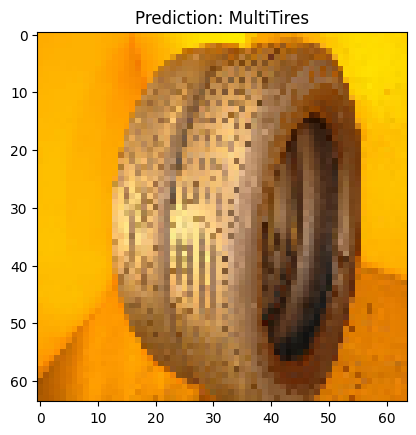

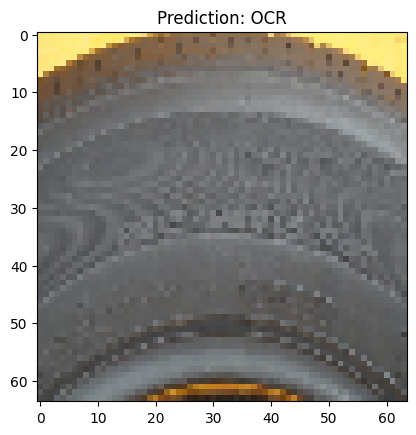

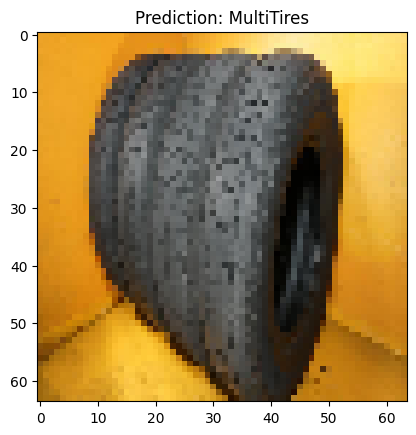

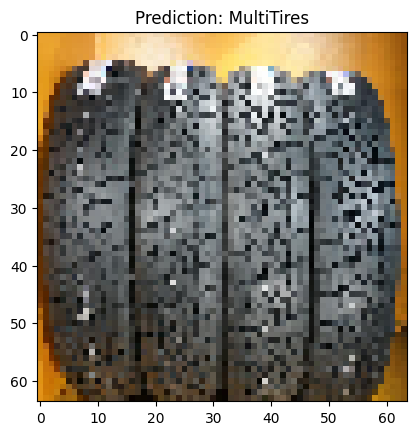

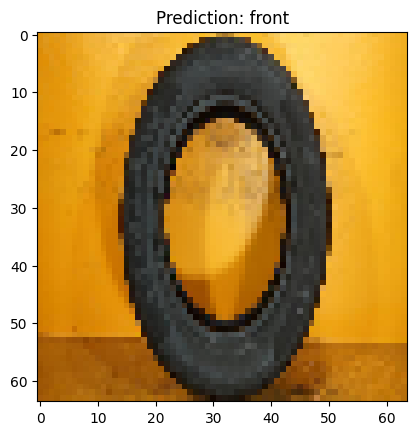

In [32]:
# checking results for the first 5 images
import matplotlib.pyplot as plt

classes = encoder.classes_

for i in range(5):
  img_flat = random_images[i]
  img = img_flat.reshape(64, 64, 3)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(f'Prediction: {classes[predictions[i]]}')
  plt.show()

For the first 5 images, the predictions are correct!

Can check for the rest of the images if the predictions are correct or not since the random dataset is not label.